In [1]:
import os

# Library for randomly selecting data points
import random

# Library for performing numerical computations
import numpy as np

import cv2 as cv

from PIL import Image

# Library for creating and showing plots
import matplotlib.pyplot as plt

# Library for reading and showing images
import matplotlib.image as mpimg

import seaborn as sns

# Importing all the required sub-modules from Keras
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [ ]:
# importing the "tarfile" module
#import tarfile

# open file
#file = tarfile.open('/content/drive/MyDrive/Speed_Challenge/speed_challenge_2017.tar')

# extracting file
#file.extractall('/content/drive/MyDrive/Speed_Challenge')

#file.close()

## **Import all images for training from the training video.**

In [ ]:
import cv2

video_path = 'C:/Users/jismo/great_learning/Speed_Challenge/speed_challenge_2017/data/train.mp4'
cap = cv2.VideoCapture(video_path)

success = True

image_id = 1

while success:
    success, image = cap.read()
    if success:
      filename = 'C:/Users/jismo/great_learning/Speed_Challenge/speed_challenge_2017/data/train/images/' + str(image_id) + '.jpg'
      cv2.imwrite(filename, image)
      image_id += 1

print("Total Extracted images:",image_id)

## **Import all images for testing from the testing video.**

In [ ]:
video_path = 'C:/Users/jismo/great_learning/Speed_Challenge/speed_challenge_2017/data/test.mp4'
cap = cv2.VideoCapture(video_path)

success = True

image_id = 1

while success:
    success, image = cap.read()
    if success:
      filename = 'C:/Users/jismo/great_learning/Speed_Challenge/speed_challenge_2017/data/test/images/' + str(image_id) + '.jpg'
      cv2.imwrite(filename, image)
      image_id += 1

print("Total Extracted images:",image_id)

In [ ]:

from PIL import Image

directory = 'C:/Users/jismo/great_learning/Speed_Challenge/speed_challenge_2017/data/test/images/'

filename = directory + str(10) + '.jpg'

image_array = []

image = Image.open(filename)
image=np.array(image)
image_array.append(image)

print(image_array[0].shape)

plt.imshow(image_array[0])


In [ ]:
import cv2 as cv
import numpy as np

def calc_dense_optical_flow(video_path,output_path):

  image_id = 1
  # The video feed is read in as a VideoCapture object
  cap = cv.VideoCapture(video_path)
  # ret = a boolean return value from getting the frame, first_frame = the first frame in the entire video sequence
  ret, first_frame = cap.read()
  # Converts frame to grayscale because we only need the luminance channel for detecting edges - less computationally expensive
  prev_gray = cv.cvtColor(first_frame, cv.COLOR_BGR2GRAY)
  # Creates an image filled with zero intensities with the same dimensions as the frame
  mask = np.zeros_like(first_frame)
  # Sets image saturation to maximum
  mask[..., 1] = 255

  while(cap.isOpened()):
      # ret = a boolean return value from getting the frame, frame = the current frame being projected in the video
      ret, frame = cap.read()

      if frame is None:
            break
      # Converts each frame to grayscale - we previously only converted the first frame to grayscale
      gray = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)
      # Calculates dense optical flow by Farneback method
      # https://docs.opencv.org/3.0-beta/modules/video/doc/motion_analysis_and_object_tracking.html#calcopticalflowfarneback
      flow = cv.calcOpticalFlowFarneback(prev_gray, gray, None, 0.5, 3, 15, 3, 5, 1.2, 0)
      # Computes the magnitude and angle of the 2D vectors
      magnitude, angle = cv.cartToPolar(flow[..., 0], flow[..., 1])
      # Sets image hue according to the optical flow direction
      mask[..., 0] = angle * 180 / np.pi / 2
      # Sets image value according to the optical flow magnitude (normalized)
      mask[..., 2] = cv.normalize(magnitude, None, 0, 255, cv.NORM_MINMAX)
      # Converts HSV to RGB (BGR) color representation
      rgb = cv.cvtColor(mask, cv.COLOR_HSV2BGR)
      # Opens a new window and displays the output frame
      #cv.imshow("dense optical flow", rgb)
      # Updates previous frame
      prev_gray = gray
      # Frames are read by intervals of 1 millisecond. The programs breaks out of the while loop when the user presses the 'q' key
      if cv.waitKey(1) & 0xFF == ord('q'):
          break
      filename = output_path + str(image_id) + '.jpg'
      cv.imwrite(filename, rgb)
      image_id += 1
  print("Total images processed:",image_id)
  # The following frees up resources and closes all windows
  cap.release()
  cv.destroyAllWindows()

In [ ]:
#training video path
video_path = 'C:/Users/jismo/great_learning/Speed_Challenge/speed_challenge_2017/data/train.mp4'
#output path to save optical flow processed train images
output_path = 'C:/Users/jismo/great_learning/Speed_Challenge/speed_challenge_2017/data/train/clean_images/'

calc_dense_optical_flow(video_path,output_path)

In [ ]:
#testing video path
video_path = 'C:/Users/jismo/great_learning/Speed_Challenge/speed_challenge_2017/data/test.mp4'
#output path to save optical flow processed test images
output_path = 'C:/Users/jismo/great_learning/Speed_Challenge/speed_challenge_2017/data/test/clean_images/'

calc_dense_optical_flow(video_path,output_path)

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

directory = 'C:/Users/jismo/great_learning/Speed_Challenge/speed_challenge_2017/data/train/clean_images/'

fig = plt.figure(figsize=(12, 12))

print("Viewing first 10 training images processed by optical dense flow")

for i in range(10):

    filename = directory + str(i + 1) + '.jpg'
    image = cv.imread(filename)
    image = np.array(image)
    ax = plt.subplot(5, 5,i+1)
    ax.axis('Off')
    plt.imshow(image)
    
cv.destroyAllWindows()

In [ ]:
directory = 'C:/Users/jismo/great_learning/Speed_Challenge/speed_challenge_2017/data/test/clean_images/'

fig = plt.figure(figsize=(12, 12))

print("Viewing first 10 testing images processed by optical dense flow")

for i in range(10):

  filename = directory + str(i + 1) + '.jpg'
  image = cv.imread(filename)
  image = np.array(image)
  ax = plt.subplot(5, 5,i+1)
  ax.axis('Off')
  plt.imshow(image,interpolation='nearest')
    
cv.destroyAllWindows()

In [2]:
# Function to apply Gaussian blurring and resizing on clean training images

import os

train_image_cnt = 0
test_image_cnt = 0

def gaussian_blur(source_img_folder,blur_img_folder):
    
    train_image_cnt = 0
    test_image_cnt = 0
    
    for file in os.listdir(source_img_folder):
        if file.endswith(".jpg"):
            image = cv.imread(source_img_folder + file)
            image = cv.GaussianBlur(image, (5, 5), 0)
            image = cv.resize(image,(200, 66),interpolation = cv.INTER_AREA)
            image = np.array(image)
            image = image.astype('float32')
            image /= 255
            if (source_img_folder.find('train') != -1):
                train_image_cnt += 1
                filename = blur_img_folder + file
                cv.imwrite(filename, image)
            if (source_img_folder.find('test') != -1):
                test_image_cnt += 1
                filename = blur_img_folder + file
                cv.imwrite(filename, image)
    print("Total training images processed:",train_image_cnt)
    print("Total testing images processed:",test_image_cnt)

In [3]:
# Apply Gaussian blur and resizing on clean training images
source_img_folder = 'C:/Users/jismo/great_learning/Speed_Challenge/speed_challenge_2017/data/train/clean_images/'
blur_img_folder = 'C:/Users/jismo/great_learning/Speed_Challenge/speed_challenge_2017/data/train/gblur_images/'

gaussian_blur(source_img_folder,blur_img_folder)

Total training images processed: 20399
Total testing images processed: 0


In [4]:
blur_img_folder = 'C:/Users/jismo/great_learning/Speed_Challenge/speed_challenge_2017/data/train/gblur_images/'

sample_train_images = []

for i in range(5):

    filename = blur_img_folder + str(i + 1) + '.jpg'
    image = cv.imread(filename)
    image = np.array(image)
    sample_train_images.append(image)
    print(sample_train_images[i].shape)
    print('Mean Pixel:',np.mean(sample_train_images[i]))
    print('Min Pixel:',np.min(sample_train_images[i]))
    print('Max Pixel:',np.max(sample_train_images[i]))
    
cv.destroyAllWindows()

(66, 200, 3)
Mean Pixel: 0.004267676767676767
Min Pixel: 0
Max Pixel: 2
(66, 200, 3)
Mean Pixel: 0.0036868686868686868
Min Pixel: 0
Max Pixel: 2
(66, 200, 3)
Mean Pixel: 0.0008333333333333334
Min Pixel: 0
Max Pixel: 1
(66, 200, 3)
Mean Pixel: 0.005606060606060606
Min Pixel: 0
Max Pixel: 2
(66, 200, 3)
Mean Pixel: 0.004090909090909091
Min Pixel: 0
Max Pixel: 2


In [6]:
# Apply Gaussian blur and resizing on clean testing images
source_img_folder = 'C:/Users/jismo/great_learning/Speed_Challenge/speed_challenge_2017/data/test/clean_images/'
blur_img_folder = 'C:/Users/jismo/great_learning/Speed_Challenge/speed_challenge_2017/data/test/gblur_images/'

gaussian_blur(source_img_folder,blur_img_folder)

Total training images processed: 0
Total testing images processed: 10797


In [10]:
blur_img_folder = 'C:/Users/jismo/great_learning/Speed_Challenge/speed_challenge_2017/data/test/gblur_images/'

sample_test_images = []

for i in range(5):

    filename = blur_img_folder + str(i + 1) + '.jpg'
    image = cv.imread(filename)
    image = np.array(image)
    sample_test_images.append(image)
    print(sample_test_images[i].shape)
    print('Mean Pixel:',np.mean(sample_test_images[i]))
    print('Min Pixel:',np.min(sample_test_images[i]))
    print('Max Pixel:',np.max(sample_test_images[i]))
    
cv.destroyAllWindows()

(66, 200, 3)
Mean Pixel: 0.024696969696969696
Min Pixel: 0
Max Pixel: 2
(66, 200, 3)
Mean Pixel: 0.021742424242424244
Min Pixel: 0
Max Pixel: 3
(66, 200, 3)
Mean Pixel: 0.004393939393939394
Min Pixel: 0
Max Pixel: 1
(66, 200, 3)
Mean Pixel: 0.004015151515151515
Min Pixel: 0
Max Pixel: 1
(66, 200, 3)
Mean Pixel: 0.007045454545454546
Min Pixel: 0
Max Pixel: 1


In [2]:
def create_train_labels(filename):
  labels = []
  cnt = 0
  for row in open(filename, 'r') :
        labels.append(float(row))
        cnt += 1

  return labels


In [3]:
train_labels = []

filename = 'C:/Users/jismo/great_learning/Speed_Challenge/speed_challenge_2017/data/train.txt'

train_labels = create_train_labels(filename)


In [4]:
train_labels.pop()

2.206759

In [5]:
train_labels = np.array(train_labels)
train_labels = train_labels.astype('float32')

print(train_labels.shape)


(20399,)


In [13]:
# create datasets for training and testing images

import os

train_images=[]

test_images=[]

def create_dataset(img_folder):

    for file in os.listdir(img_folder):
        if file.endswith(".jpg"):
            image = cv.imread(img_folder + file)
            # image = image.resize((200, 66))
            #  image = cv.GaussianBlur(image, (5, 5), 0)
            image = np.array(image)
            image = image.astype('float32')
            # image /= 255
            if (img_folder.find('train') != -1):
                train_images.append(image)
            if (img_folder.find('test') != -1):
                test_images.append(image)

In [6]:
# create dataset for training images
train_images=[]

gblur_train_images_dir = 'C:/Users/jismo/great_learning/Speed_Challenge/speed_challenge_2017/data/train/gblur_images/'

create_dataset(gblur_train_images_dir)


In [7]:
# create dataset for testing images
gblur_test_images_dir = 'C:/Users/jismo/great_learning/Speed_Challenge/speed_challenge_2017/data/test/gblur_images/'

create_dataset(gblur_test_images_dir)

In [8]:
#convert training and testing datasets to numpy arrays

train_images = np.array(train_images)
train_images = train_images.astype('float32')

test_images = np.array(test_images)
test_images = test_images.astype('float32')



In [ ]:
print("Shape of Training images:",train_images.shape)
print("Shape of Testing images:",test_images.shape)


In [ ]:
plt.imshow(train_images[100])


In [ ]:
plt.imshow(test_images[100])

In [11]:
print("No of Train images:",len(train_images))
print("Shape of Train images:",train_images.shape)
print("No of Test images:",len(test_images))
print("Shape of Test images:",test_images.shape)
print("Shape of Train Labels:",train_labels.shape)




No of Train images: 20399
Shape of Train images: (20399, 66, 200, 3)
No of Test images: 10797
Shape of Test images: (10797, 66, 200, 3)
Shape of Train Labels: (20399,)


In [6]:
# For Model Building
import tensorflow as tf
import keras
from tensorflow.keras.models import Sequential, Model # Sequential api for sequential model

# Clearing backend
from tensorflow.keras import backend

from tensorflow.keras.utils import to_categorical

from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

from random import shuffle

import numpy as np

# Sequential model
sc_model = Sequential()
sc_model.add(Conv2D(64, (5,5), activation='relu', input_shape=(66, 200,3)))
#sc_model.add(MaxPooling2D(2,2))
sc_model.add(Conv2D(32, (5,5), activation='relu'))
#sc_model.add(MaxPooling2D(2,2))
sc_model.add(Conv2D(32, (5,5), activation='relu'))
#sc_model.add(MaxPooling2D(5,5))
sc_model.add(Conv2D(32, (5,5), activation='relu'))
sc_model.add(MaxPooling2D(5,5))
sc_model.add(Dropout(0.3))
sc_model.add(Flatten())
sc_model.add(Dense(128, activation='relu'))
sc_model.add(Dropout(0.3))
sc_model.add(Dense(32, activation='relu'))
sc_model.add(Dense(32, activation='relu'))
sc_model.add(Dense(16, activation='relu'))
sc_model.add(Dense(1, activation='linear'))



In [21]:
sc_model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 196, 64)       4864      
                                                                 
 conv2d_1 (Conv2D)           (None, 58, 192, 32)       51232     
                                                                 
 conv2d_2 (Conv2D)           (None, 54, 188, 32)       25632     
                                                                 
 conv2d_3 (Conv2D)           (None, 50, 184, 32)       25632     
                                                                 
 max_pooling2d (MaxPooling2  (None, 10, 36, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 10, 36, 32)        0         
                                                        

In [22]:
opt = tf.keras.optimizers.Adam(learning_rate=0.0001)
sc_model.compile(optimizer=opt,loss='mse',metrics='mae')

In [23]:
my_callbacks = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
# This callback will stop the training when there is no improvement in
# the loss for ten consecutive epochs.

In [24]:
# Clearing backend
from tensorflow.keras import backend

backend.clear_session()

# Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)

import random

random.seed(42)

tf.random.set_seed(42)

In [ ]:
sc_history = sc_model.fit(train_images,train_labels, batch_size = 32, shuffle=False, validation_split = 0.2, epochs = 20, verbose = 1, callbacks=my_callbacks)

Epoch 1/20
510/510 [==============================] - 2452s 5s/step - loss: 51.9309 - mae: 4.8568 - val_loss: 22.7113 - val_mae: 3.5833
Epoch 2/20
510/510 [==============================] - 22292s 44s/step - loss: 23.7910 - mae: 3.4891 - val_loss: 21.2639 - val_mae: 3.5600
Epoch 3/20
510/510 [==============================] - 1336s 3s/step - loss: 22.2296 - mae: 3.3604 - val_loss: 20.2367 - val_mae: 3.5617
Epoch 4/20
510/510 [==============================] - 1457s 3s/step - loss: 22.1004 - mae: 3.3716 - val_loss: 19.3893 - val_mae: 3.5818
Epoch 5/20
510/510 [==============================] - 10614s 21s/step - loss: 22.4872 - mae: 3.4073 - val_loss: 18.9236 - val_mae: 3.6105
Epoch 6/20
510/510 [==============================] - 3748s 7s/step - loss: 23.2262 - mae: 3.5078 - val_loss: 18.7085 - val_mae: 3.6364
Epoch 7/20
510/510 [==============================] - 1451s 3s/step - loss: 24.0003 - mae: 3.5993 - val_loss: 18.8213 - val_mae: 3.6216
Epoch 8/20
510/510 [========================

In [ ]:
# Make predictions based on sc_model
result = []
for i in range(10):
    result.append(sc_model.predict(test_images[i:i+1]))

for i in range(10):
  print(i,result[i])




In [13]:
backend.clear_session()

# Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)

import random

random.seed(42)

tf.random.set_seed(42)

In [14]:
sc_model2 = tf.keras.models.Sequential([

        tf.keras.layers.BatchNormalization(input_shape=(66, 200,3)),
        tf.keras.layers.Conv2D(24, (5, 5), activation='elu', strides=(2, 2)),
        tf.keras.layers.Conv2D(36, (5, 5), activation='elu', strides=(2, 2)),
        tf.keras.layers.Conv2D(48, (5, 5), activation='elu', strides=(2, 2)),
        tf.keras.layers.Conv2D(64, (3, 3), activation='elu'),
        tf.keras.layers.Conv2D(64, (3, 3), activation='elu'),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(256, activation='elu'),
        tf.keras.layers.Dense(50, activation='elu'),
        tf.keras.layers.Dense(10, activation='elu'),
        tf.keras.layers.Dense(1, name='output')

    ])

In [15]:
opt = tf.keras.optimizers.Adam(learning_rate=0.0001)
sc_model2.compile(optimizer=opt,loss='mse',metrics='mae')

In [16]:
sc_model2.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization (Batch  (None, 66, 200, 3)        12        
 Normalization)                                                  
                                                                 
 conv2d (Conv2D)             (None, 31, 98, 24)        1824      
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 47, 36)        21636     
                                                                 
 conv2d_2 (Conv2D)           (None, 5, 22, 48)         43248     
                                                                 
 conv2d_3 (Conv2D)           (None, 3, 20, 64)         27712     
                                                                 
 conv2d_4 (Conv2D)           (None, 1, 18, 64)         36928     
                                                        

In [17]:
my_callbacks = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
# This callback will stop the training when there is no improvement in
# the loss for ten consecutive epochs.

In [18]:
sc_history2 = sc_model2.fit(train_images,train_labels, batch_size = 32, shuffle=False, validation_split = 0.2, epochs = 100, verbose = 1, callbacks=my_callbacks)

Epoch 1/100
510/510 [==============================] - 100s 193ms/step - loss: 34.9783 - mae: 3.9524 - val_loss: 20.6555 - val_mae: 3.5302
Epoch 2/100
510/510 [==============================] - 101s 198ms/step - loss: 22.1267 - mae: 3.3571 - val_loss: 19.9794 - val_mae: 3.5189
Epoch 3/100
510/510 [==============================] - 100s 197ms/step - loss: 22.5483 - mae: 3.3466 - val_loss: 18.5515 - val_mae: 3.6093
Epoch 4/100
510/510 [==============================] - 95s 187ms/step - loss: 21.8100 - mae: 3.3430 - val_loss: 18.6260 - val_mae: 3.7389
Epoch 5/100
510/510 [==============================] - 96s 189ms/step - loss: 22.3885 - mae: 3.4153 - val_loss: 18.6130 - val_mae: 3.6831
Epoch 6/100
510/510 [==============================] - 96s 188ms/step - loss: 22.1037 - mae: 3.3684 - val_loss: 18.5877 - val_mae: 3.6591
Epoch 7/100
510/510 [==============================] - 97s 190ms/step - loss: 27.5317 - mae: 3.8832 - val_loss: 21.9498 - val_mae: 3.6778
Epoch 8/100
510/510 [==========

In [ ]:
# Make predictions based on sc_model2
result = []
for i in range(10):
    result.append(sc_model2.predict(test_images[i:i+1]))

for i in range(10):
  print(i,result[i])

In [ ]:
#I select the first model,sc_model as a model of choice and want to use that for making predictions.

predictions = sc_model.predict(test_images)

print(len(predictions))




In [ ]:
import pandas as pd

os.chdir = '/content/drive/MyDrive/Speed_Challenge/data/test/predictions'
prediction_csv = pd.DataFrame(predictions, columns=['predictions']).to_csv('predictions.csv')

In [6]:
# create numpy arrays for training and testing datasets

import os

clean_train_images=[]

clean_test_images=[]

def create_dataset_clean(clean_img_folder):

        for file in os.listdir(clean_img_folder):
            if file.endswith(".jpg"):
                image = Image.open(clean_img_folder + file)
                image = image.resize((200, 66))
                image=np.array(image)
                image = image.astype('float32')
                image /= 255
                if (clean_img_folder.find('train') != -1):
                  clean_train_images.append(image)
                if (clean_img_folder.find('test') != -1):
                  clean_test_images.append(image)

In [7]:
# create dataset for training images using optical dense flow without blurring
clean_train_images=[]

clean_train_images_dir = 'C:/Users/jismo/great_learning/Speed_Challenge/speed_challenge_2017/data/train/clean_images/'

create_dataset_clean(clean_train_images_dir)

In [8]:
# create dataset for training images using optical dense flow without blurring
clean_test_images=[]

clean_test_images_dir = 'C:/Users/jismo/great_learning/Speed_Challenge/speed_challenge_2017/data/test/clean_images/'

create_dataset_clean(clean_test_images_dir)

In [9]:
#convert training and testing datasets to numpy arrays

clean_train_images = np.array(clean_train_images)
clean_train_images = clean_train_images.astype('float32')

clean_test_images = np.array(clean_test_images)
clean_test_images = clean_test_images.astype('float32')

In [10]:
print("No of Train images:",len(clean_train_images))
print("Shape of Train images:",clean_train_images.shape)
print("No of Test images:",len(clean_test_images))
print("Shape of Test images:",clean_test_images.shape)
print("Shape of Train Labels:",train_labels.shape)

No of Train images: 20399
Shape of Train images: (20399, 66, 200, 3)
No of Test images: 10797
Shape of Test images: (10797, 66, 200, 3)
Shape of Train Labels: (20399,)


In [11]:
# For Model Building
import tensorflow as tf
import keras
from tensorflow.keras.models import Sequential, Model # Sequential api for sequential model

# Clearing backend
from tensorflow.keras import backend

from tensorflow.keras.utils import to_categorical

from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

from random import shuffle

import numpy as np
sc_model3 = tf.keras.models.Sequential([

        tf.keras.layers.BatchNormalization(input_shape=(66, 200,3)),
        tf.keras.layers.Conv2D(24, (5, 5), activation='relu', strides=(2, 2)),
        tf.keras.layers.Conv2D(36, (5, 5), activation='relu', strides=(2, 2)),
        tf.keras.layers.Conv2D(48, (5, 5), activation='relu', strides=(2, 2)),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(16, activation='relu'),
        tf.keras.layers.Dense(1, name='output')

    ])

In [12]:
opt = tf.keras.optimizers.Adam(learning_rate=0.0001)
sc_model3.compile(optimizer=opt,loss='mse',metrics='mae')

In [13]:
sc_model3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization (Batch  (None, 66, 200, 3)        12        
 Normalization)                                                  
                                                                 
 conv2d (Conv2D)             (None, 31, 98, 24)        1824      
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 47, 36)        21636     
                                                                 
 conv2d_2 (Conv2D)           (None, 5, 22, 48)         43248     
                                                                 
 conv2d_3 (Conv2D)           (None, 3, 20, 64)         27712     
                                                                 
 conv2d_4 (Conv2D)           (None, 1, 18, 64)         36928     
                                                        

In [14]:
#my_callbacks = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
my_callbacks = [EarlyStopping(monitor = 'val_loss', patience = 10),
             ModelCheckpoint('.mdl_wts.hdf5', monitor = 'val_loss', save_best_only = True)]
# This callback will stop the training when there is no improvement in
# the loss for ten consecutive epochs.

In [44]:
sc_history3 = sc_model3.fit(clean_train_images,train_labels, batch_size = 32, shuffle=False, validation_split = 0.2, epochs = 100, verbose = 1, callbacks=my_callbacks)

Epoch 1/100
510/510 [==============================] - 97s 183ms/step - loss: 40.2484 - mae: 4.4679 - val_loss: 29.3042 - val_mae: 3.8415
Epoch 2/100
510/510 [==============================] - 89s 175ms/step - loss: 24.5122 - mae: 3.5592 - val_loss: 22.8524 - val_mae: 3.6055
Epoch 3/100
510/510 [==============================] - 90s 177ms/step - loss: 23.1156 - mae: 3.4447 - val_loss: 21.7531 - val_mae: 3.5889
Epoch 4/100
510/510 [==============================] - 92s 181ms/step - loss: 22.0166 - mae: 3.3487 - val_loss: 20.7992 - val_mae: 3.5834
Epoch 5/100
510/510 [==============================] - 94s 183ms/step - loss: 21.3070 - mae: 3.2926 - val_loss: 20.4813 - val_mae: 3.5884
Epoch 6/100
510/510 [==============================] - 94s 185ms/step - loss: 20.7045 - mae: 3.2336 - val_loss: 19.8487 - val_mae: 3.6007
Epoch 7/100
510/510 [==============================] - 99s 194ms/step - loss: 20.2298 - mae: 3.2003 - val_loss: 19.5276 - val_mae: 3.6115
Epoch 8/100
510/510 [=============

In [8]:
backend.clear_session()

# Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)

import random

random.seed(42)

tf.random.set_seed(42)

In [15]:
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(clean_train_images, train_labels, test_size = 0.2, random_state = 42)

train_datagen = ImageDataGenerator(
    zoom_range=[0.5,1.0],
   # brightness_range=[0.2,1.0]
)
val_datagen  = ImageDataGenerator()

train_generator = train_datagen.flow(x_train, y_train, batch_size = 32, seed = 42, shuffle = True)
val_generator = val_datagen.flow(x_test, y_test, batch_size = 32, seed = 42, shuffle = True)

In [16]:
opt = tf.keras.optimizers.Adam(learning_rate=0.0001)
sc_model3.compile(optimizer=opt,loss='mse',metrics='mae')

In [17]:
#my_callbacks = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
my_callbacks = [EarlyStopping(monitor = 'val_loss', patience = 10),
             ModelCheckpoint('.mdl_wts.hdf5', monitor = 'val_loss', save_best_only = True)]
# This callback will stop the training when there is no improvement in
# the loss for ten consecutive epochs.

In [18]:
sc_model3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization (Batch  (None, 66, 200, 3)        12        
 Normalization)                                                  
                                                                 
 conv2d (Conv2D)             (None, 31, 98, 24)        1824      
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 47, 36)        21636     
                                                                 
 conv2d_2 (Conv2D)           (None, 5, 22, 48)         43248     
                                                                 
 conv2d_3 (Conv2D)           (None, 3, 20, 64)         27712     
                                                                 
 conv2d_4 (Conv2D)           (None, 1, 18, 64)         36928     
                                                        

In [19]:
sc_history4 = sc_model3.fit(train_generator,validation_data = val_generator, batch_size = 32, epochs = 400, verbose = 1, callbacks=my_callbacks)

Epoch 1/400
510/510 [==============================] - ETA: 0s - loss: 74.6028 - mae: 7.3699

C:\Users\jismo\anaconda3\envs\colab\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


510/510 [==============================] - 102s 186ms/step - loss: 74.6028 - mae: 7.3699 - val_loss: 67.6766 - val_mae: 6.8317
Epoch 2/400
510/510 [==============================] - 85s 167ms/step - loss: 63.3474 - mae: 6.8366 - val_loss: 55.5930 - val_mae: 6.3263
Epoch 3/400
510/510 [==============================] - 101s 199ms/step - loss: 59.7240 - mae: 6.5662 - val_loss: 53.2854 - val_mae: 6.0834
Epoch 4/400
510/510 [==============================] - 102s 200ms/step - loss: 56.4441 - mae: 6.3242 - val_loss: 47.8484 - val_mae: 5.6659
Epoch 5/400
510/510 [==============================] - 89s 175ms/step - loss: 52.8383 - mae: 6.0508 - val_loss: 56.0400 - val_mae: 6.1811
Epoch 6/400
510/510 [==============================] - 89s 175ms/step - loss: 51.6623 - mae: 5.9680 - val_loss: 45.1357 - val_mae: 5.5841
Epoch 7/400
510/510 [==============================] - 88s 172ms/step - loss: 50.0656 - mae: 5.8428 - val_loss: 45.7741 - val_mae: 5.6420
Epoch 8/400
510/510 [======================

Epoch 60/400
510/510 [==============================] - 96s 188ms/step - loss: 24.8071 - mae: 3.7671 - val_loss: 21.1934 - val_mae: 3.4096
Epoch 61/400
510/510 [==============================] - 99s 194ms/step - loss: 24.1530 - mae: 3.6995 - val_loss: 22.3908 - val_mae: 3.6287
Epoch 62/400
510/510 [==============================] - 96s 187ms/step - loss: 24.6185 - mae: 3.7538 - val_loss: 22.8184 - val_mae: 3.5293
Epoch 63/400
510/510 [==============================] - 100s 196ms/step - loss: 24.6189 - mae: 3.7516 - val_loss: 22.5305 - val_mae: 3.5964
Epoch 64/400
510/510 [==============================] - 96s 188ms/step - loss: 24.6110 - mae: 3.7276 - val_loss: 20.5736 - val_mae: 3.3287
Epoch 65/400
510/510 [==============================] - 96s 189ms/step - loss: 24.1496 - mae: 3.6968 - val_loss: 27.3031 - val_mae: 3.8638
Epoch 66/400
510/510 [==============================] - 100s 195ms/step - loss: 23.1768 - mae: 3.6273 - val_loss: 19.4480 - val_mae: 3.2503
Epoch 67/400
510/510 [===

In [23]:
#Best model so far and want to use that for making predictions.

predictions = sc_model3.predict(clean_test_images)
import pandas as pd

os.chdir =  'C:/Users/jismo/great_learning/Speed_Challenge/speed_challenge_2017/data/test/'
prediction_csv = pd.DataFrame(predictions, columns=['predictions']).to_csv('predictions.csv')

338/338 [==============================] - 9s 24ms/step


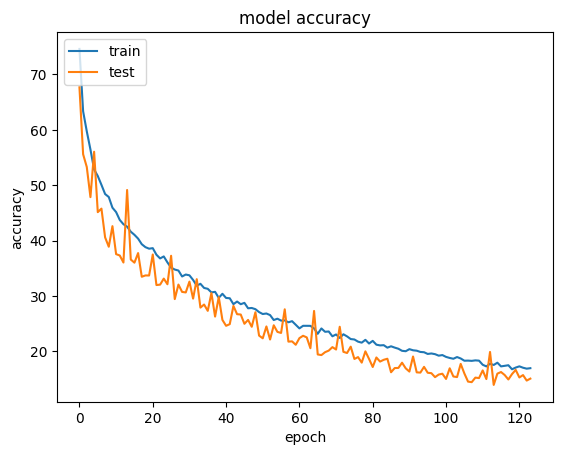

In [34]:
# Function to plot train and validation accuracy
plt.plot(sc_history4 .history['loss'])
plt.plot(sc_history4 .history['val_loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [30]:
sc_model3.save('C:/Users/jismo/great_learning/Speed_Challenge/speed_challenge_2017/Models/sc_model3.keras')

In [12]:
# For Model Building
import tensorflow as tf
import keras
from tensorflow.keras.models import Sequential, Model # Sequential api for sequential model

# Clearing backend
from tensorflow.keras import backend

from tensorflow.keras.utils import to_categorical

from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

from random import shuffle

import numpy as np
sc_model4 = tf.keras.models.Sequential([

        tf.keras.layers.BatchNormalization(input_shape=(66, 200,3)),
        tf.keras.layers.Conv2D(24, (5, 5), activation='relu', strides=(2, 2)),
        tf.keras.layers.Conv2D(36, (5, 5), activation='relu', strides=(2, 2)),
        tf.keras.layers.Conv2D(48, (5, 5), activation='relu', strides=(2, 2)),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(16, activation='relu'),
        tf.keras.layers.Dense(1, activation='linear')

    ])

In [13]:
opt = tf.keras.optimizers.Adam(learning_rate=0.0001)
sc_model4.compile(optimizer=opt,loss='mse',metrics='mae')

In [18]:
my_callbacks = [EarlyStopping(monitor = 'val_loss', patience = 15)]

In [19]:
sc_model4.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization (Batch  (None, 66, 200, 3)        12        
 Normalization)                                                  
                                                                 
 conv2d (Conv2D)             (None, 31, 98, 24)        1824      
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 47, 36)        21636     
                                                                 
 conv2d_2 (Conv2D)           (None, 5, 22, 48)         43248     
                                                                 
 conv2d_3 (Conv2D)           (None, 3, 20, 64)         27712     
                                                                 
 conv2d_4 (Conv2D)           (None, 1, 18, 64)         36928     
                                                        

In [20]:
sc_history5 = sc_model4.fit(train_generator,validation_data = val_generator, batch_size = 32, epochs = 400, verbose = 1, callbacks=my_callbacks)

Epoch 1/400
510/510 [==============================] - 94s 179ms/step - loss: 77.3023 - mae: 7.4616 - val_loss: 67.2509 - val_mae: 6.8479
Epoch 2/400
510/510 [==============================] - 95s 186ms/step - loss: 64.7370 - mae: 6.9327 - val_loss: 58.5058 - val_mae: 6.4596
Epoch 3/400
510/510 [==============================] - 92s 181ms/step - loss: 61.5579 - mae: 6.7111 - val_loss: 52.8372 - val_mae: 6.1701
Epoch 4/400
510/510 [==============================] - 93s 182ms/step - loss: 58.0279 - mae: 6.4509 - val_loss: 51.6721 - val_mae: 5.7983
Epoch 5/400
510/510 [==============================] - 91s 178ms/step - loss: 54.4291 - mae: 6.1704 - val_loss: 52.1015 - val_mae: 5.8227
Epoch 6/400
510/510 [==============================] - 93s 182ms/step - loss: 52.0158 - mae: 5.9917 - val_loss: 46.1902 - val_mae: 5.6088
Epoch 7/400
510/510 [==============================] - 97s 189ms/step - loss: 49.9859 - mae: 5.8551 - val_loss: 49.0626 - val_mae: 5.6066
Epoch 8/400
510/510 [=============

Epoch 60/400
510/510 [==============================] - 92s 179ms/step - loss: 24.0949 - mae: 3.7000 - val_loss: 19.7393 - val_mae: 3.3142
Epoch 61/400
510/510 [==============================] - 91s 178ms/step - loss: 24.1501 - mae: 3.6985 - val_loss: 23.1170 - val_mae: 3.6468
Epoch 62/400
510/510 [==============================] - 92s 180ms/step - loss: 23.6732 - mae: 3.6641 - val_loss: 20.0417 - val_mae: 3.2903
Epoch 63/400
510/510 [==============================] - 90s 177ms/step - loss: 23.6921 - mae: 3.6517 - val_loss: 20.2533 - val_mae: 3.2988
Epoch 64/400
510/510 [==============================] - 92s 179ms/step - loss: 23.4221 - mae: 3.6269 - val_loss: 21.1013 - val_mae: 3.4108
Epoch 65/400
510/510 [==============================] - 91s 178ms/step - loss: 23.6991 - mae: 3.6550 - val_loss: 21.1964 - val_mae: 3.4620
Epoch 66/400
510/510 [==============================] - 91s 178ms/step - loss: 23.0984 - mae: 3.6097 - val_loss: 20.1104 - val_mae: 3.3842
Epoch 67/400
510/510 [=====

Epoch 119/400
510/510 [==============================] - 91s 179ms/step - loss: 16.5363 - mae: 2.9293 - val_loss: 15.1452 - val_mae: 2.8093
Epoch 120/400
510/510 [==============================] - 91s 178ms/step - loss: 16.4064 - mae: 2.9081 - val_loss: 14.3755 - val_mae: 2.6580
Epoch 121/400
510/510 [==============================] - 91s 178ms/step - loss: 15.8027 - mae: 2.8570 - val_loss: 14.0434 - val_mae: 2.6403
Epoch 122/400
510/510 [==============================] - 91s 178ms/step - loss: 16.0378 - mae: 2.8802 - val_loss: 12.9816 - val_mae: 2.5575
Epoch 123/400
510/510 [==============================] - 92s 180ms/step - loss: 15.8994 - mae: 2.8471 - val_loss: 14.6042 - val_mae: 2.6466
Epoch 124/400
510/510 [==============================] - 90s 176ms/step - loss: 15.7005 - mae: 2.8468 - val_loss: 13.6750 - val_mae: 2.5905
Epoch 125/400
510/510 [==============================] - 91s 179ms/step - loss: 15.8474 - mae: 2.8514 - val_loss: 13.8177 - val_mae: 2.6191
Epoch 126/400
510/51

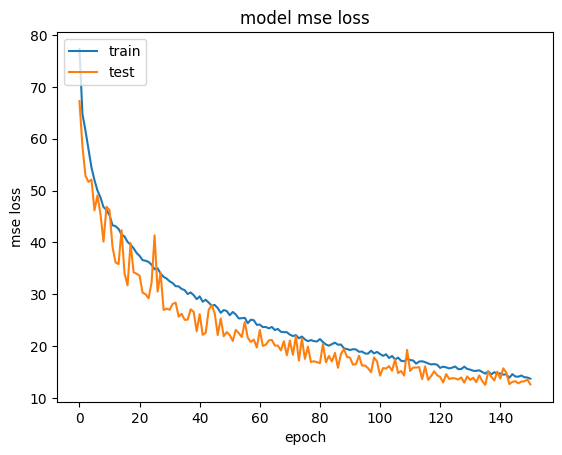

In [21]:
# Function to plot train and validation accuracy
plt.plot(sc_history5.history['loss'])
plt.plot(sc_history5.history['val_loss'])
plt.title('model mse loss')
plt.ylabel('mse loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [22]:
#Best model so far and want to use that for making predictions.

predictions = sc_model4.predict(clean_test_images)
import pandas as pd

os.chdir =  'C:/Users/jismo/great_learning/Speed_Challenge/speed_challenge_2017/data/test/'
prediction_csv = pd.DataFrame(predictions, columns=['predictions']).to_csv('predictions_sc4.csv')

338/338 [==============================] - 10s 27ms/step


In [23]:
sc_model4.save('C:/Users/jismo/great_learning/Speed_Challenge/speed_challenge_2017/Models/sc_model4.keras')

In [14]:
# Change callback to use loss for monitoring instead of validation loss to get best results as we have seen that
#the loss is decreasing with each epoch.
my_callbacks = [EarlyStopping(monitor = 'loss', patience = 15)]

In [16]:
# Use same model to get improved results based on updated callback based on loss monitoring.
sc_history6 = sc_model4.fit(train_generator,validation_data = val_generator, batch_size = 32, epochs = 400, verbose = 1, callbacks=my_callbacks)

Epoch 1/400
510/510 [==============================] - 98s 186ms/step - loss: 76.1415 - mae: 7.4429 - val_loss: 66.1071 - val_mae: 6.8695
Epoch 2/400
510/510 [==============================] - 99s 195ms/step - loss: 64.2396 - mae: 6.8910 - val_loss: 56.3491 - val_mae: 6.3169
Epoch 3/400
510/510 [==============================] - 99s 194ms/step - loss: 59.4274 - mae: 6.5475 - val_loss: 50.4763 - val_mae: 5.9313
Epoch 4/400
510/510 [==============================] - 96s 187ms/step - loss: 56.3899 - mae: 6.3093 - val_loss: 47.3418 - val_mae: 5.6064
Epoch 5/400
510/510 [==============================] - 96s 188ms/step - loss: 53.5300 - mae: 6.1020 - val_loss: 46.1851 - val_mae: 5.5385
Epoch 6/400
510/510 [==============================] - 94s 185ms/step - loss: 50.8301 - mae: 5.9048 - val_loss: 46.9005 - val_mae: 5.5882
Epoch 7/400
510/510 [==============================] - 94s 185ms/step - loss: 49.8245 - mae: 5.8253 - val_loss: 45.9016 - val_mae: 5.4611
Epoch 8/400
510/510 [=============

510/510 [==============================] - 107s 209ms/step - loss: 13.8530 - mae: 2.6233 - val_loss: 13.1033 - val_mae: 2.5708
Epoch 149/400
510/510 [==============================] - 107s 210ms/step - loss: 13.5451 - mae: 2.6029 - val_loss: 14.2503 - val_mae: 2.6559
Epoch 150/400
510/510 [==============================] - 107s 209ms/step - loss: 13.8755 - mae: 2.6250 - val_loss: 15.3902 - val_mae: 2.7251
Epoch 151/400
510/510 [==============================] - 110s 214ms/step - loss: 13.6252 - mae: 2.5931 - val_loss: 13.6664 - val_mae: 2.5236
Epoch 152/400
510/510 [==============================] - 117s 229ms/step - loss: 13.3417 - mae: 2.5780 - val_loss: 12.9091 - val_mae: 2.4516
Epoch 153/400
510/510 [==============================] - 109s 214ms/step - loss: 13.8210 - mae: 2.6191 - val_loss: 13.2872 - val_mae: 2.5482
Epoch 154/400
510/510 [==============================] - 112s 219ms/step - loss: 12.9705 - mae: 2.5352 - val_loss: 13.2048 - val_mae: 2.5294
Epoch 155/400
510/510 [====

510/510 [==============================] - 99s 194ms/step - loss: 8.4375 - mae: 1.9806 - val_loss: 11.4370 - val_mae: 2.2250
Epoch 268/400
510/510 [==============================] - 103s 201ms/step - loss: 8.4110 - mae: 1.9526 - val_loss: 10.8966 - val_mae: 2.1410
Epoch 269/400
510/510 [==============================] - 103s 201ms/step - loss: 8.3698 - mae: 1.9490 - val_loss: 10.6472 - val_mae: 2.0990
Epoch 270/400
510/510 [==============================] - 104s 204ms/step - loss: 8.4539 - mae: 1.9607 - val_loss: 11.3982 - val_mae: 2.1990
Epoch 271/400
510/510 [==============================] - 103s 202ms/step - loss: 8.4576 - mae: 1.9617 - val_loss: 9.9696 - val_mae: 2.0294
Epoch 272/400
510/510 [==============================] - 108s 211ms/step - loss: 8.6916 - mae: 1.9774 - val_loss: 11.1577 - val_mae: 2.1220
Epoch 273/400
510/510 [==============================] - 105s 205ms/step - loss: 8.6031 - mae: 1.9620 - val_loss: 10.6166 - val_mae: 2.1622
Epoch 274/400
510/510 [=============

In [17]:
sc_model4.save('C:/Users/jismo/great_learning/Speed_Challenge/speed_challenge_2017/Models/sc_model4.keras')

In [18]:
predictions = sc_model4.predict(clean_test_images)
import pandas as pd

os.chdir =  'C:/Users/jismo/great_learning/Speed_Challenge/speed_challenge_2017/data/predictions/'
prediction_csv = pd.DataFrame(predictions, columns=['predictions']).to_csv('predictions_sc4.csv')

338/338 [==============================] - 10s 26ms/step


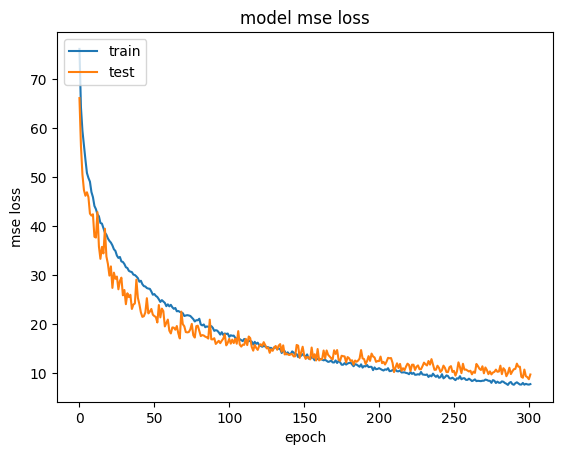

In [19]:
# Function to plot train and validation loss
plt.plot(sc_history6.history['loss'])
plt.plot(sc_history6.history['val_loss'])
plt.title('model mse loss')
plt.ylabel('mse loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

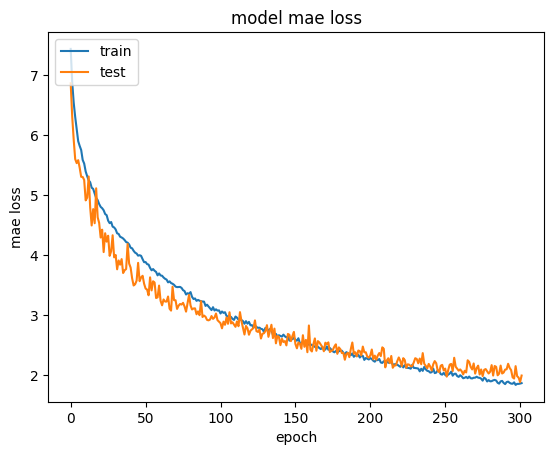

In [20]:
# Function to plot train and validation mae loss
plt.plot(sc_history6.history['mae'])
plt.plot(sc_history6.history['val_mae'])
plt.title('model mae loss')
plt.ylabel('mae loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()